In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

In [8]:
# CLASSES = ('road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
#            'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
#            'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
#            'bicycle')

PALETTE = [[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156],
           [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0],
           [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60],
           [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100],
           [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 0]]

PALETTE = [[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156],
           [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0],
           [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60],
           [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100],
           [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 0]]

res = []
for i in range(19):
    bundle = {'x': PALETTE[i][0], 'y': PALETTE[i][1], 'z': PALETTE[i][2]}
    res.append(bundle)

df = pd.DataFrame(data=res, columns=['x', 'y', 'z'])

In [13]:
fig = px.scatter_3d(data_frame=df,
                    x=df['x'],
                    y=df['y'],
                    z=df['z'],
                    width=1200,
                    height=1200,
                    color='z'
                    )
fig.show()

In [10]:
import scipy.io as sio
import torch
import glob
import numpy
import torch.nn.functional as F
def get_freq(indices):
    freq = torch.zeros(8192)
    indices = indices.flatten()
    for indice in indices:
        freq[indice] += 1
    return freq

# # 统计所有indice出现的频次，直方图
root_path = '../work_dirs/anal/val'
list = glob.glob(root_path + '/*')


# print(data.keys())
# print('semantic_seg_pred', data['semantic_seg_pred'].shape)
# print('gt_semantic_seg', data['gt_semantic_seg'].shape)
# print('vq_indices', data['vq_indices'].shape)
# print('vq_indice_gt', data['vq_indice_gt'].shape)

from IPython.display import display, Image

# freq = get_freq(data['vq_indice_gt'])
# print('sum', freq.sum().item())
# freq[freq != 0] = 1
# print('zeros', freq.sum().item())
# print()



dict_keys(['__header__', '__version__', '__globals__', 'semantic_seg_pred', 'gt_semantic_seg', 'vq_indices', 'vq_indice_gt'])
semantic_seg_pred (1, 1, 1024, 2048)
gt_semantic_seg (1, 1, 1024, 2048)
vq_indices (1, 1, 128, 256)
vq_indice_gt (1, 1, 128, 256)
sum 32768.0
zeros 2488.0



In [66]:
# PALETTE = torch.tensor([[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156],
#            [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0],
#            [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60],
#            [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100],
#            [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 0]])

PALETTE = torch.tensor([[128, 64, 128], [240, 70, 232], [150, 0, 255], [0, 255, 200],
           [255, 255, 200], [10, 50, 150], [250, 170, 30], [220, 220, 0],
           [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60],
           [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100],
           [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 0]])
CLASSES = ('road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
           'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
           'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
           'bicycle')
def encode_to_segmap(indice):
    PALETTE_ = PALETTE.clone().to(indice.device)
    _indice = indice.clone().detach()
    _indice[_indice > 19] = 19
    # print('cjq debug:', PALETTE_.shape)
    # print(_indice.shape)
    return PALETTE_[_indice.long()].squeeze(1).permute(0, 3, 1, 2)

def decode_from_segmap(segmap, num_classes=20):
    PALETTE_ = PALETTE[:num_classes].clone().detach().to(segmap.device)
    B, C, H, W = segmap.shape
    p = torch.Tensor.repeat(PALETTE_, B, H, W, 1, 1).permute(0, 3, 4, 1, 2)
    segmap = torch.Tensor.repeat(segmap, num_classes, 1, 1, 1, 1).permute(1, 0, 2, 3, 4)
    return torch.abs(segmap - p).sum(2).argmin(1).unsqueeze(1)

def draw_segmap_from_indice(indice):
    return encode_to_segmap(torch.tensor(indice).float())[0].permute(1, 2, 0)

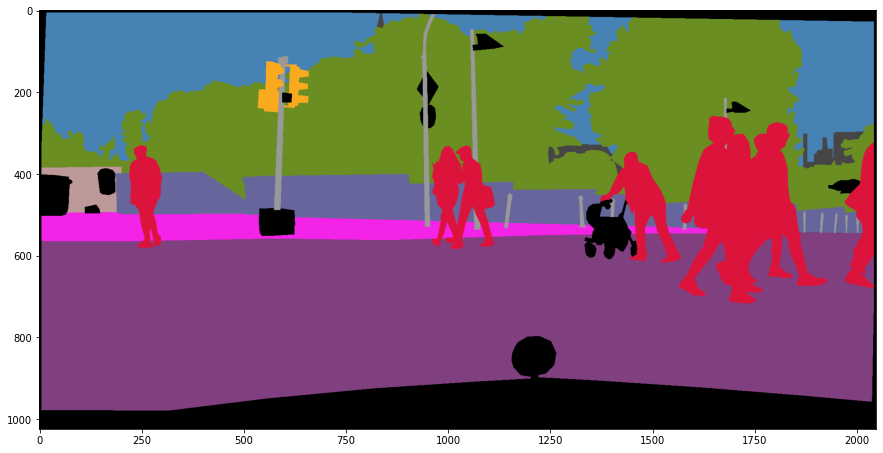

In [20]:
import matplotlib.pyplot as plt
import torch
from mmseg.models.utils.dalle_d_vae import get_dalle_vae, map_pixels, unmap_pixels, encode_to_segmap, decode_from_segmap
data = sio.loadmat(list[10])
gt_seg_map = draw_segmap_from_indice(data['gt_semantic_seg'])
pred_seg_map = draw_segmap_from_indice(data['semantic_seg_pred'])
plt.figure(figsize=(15,10))
plt.imshow(gt_seg_map)
plt.show()

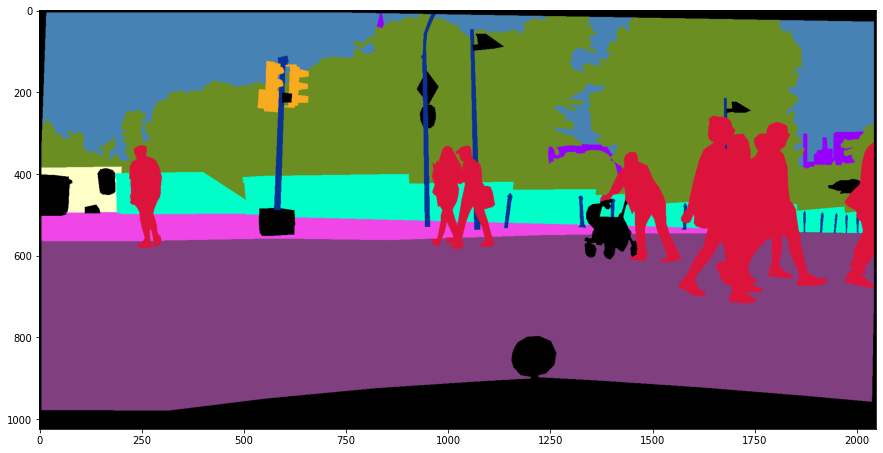

In [67]:
import matplotlib.pyplot as plt
import torch
# from mmseg.models.utils.dalle_d_vae import get_dalle_vae, map_pixels, unmap_pixels, encode_to_segmap, decode_from_segmap
data = sio.loadmat(list[10])
gt_seg_map = draw_segmap_from_indice(data['gt_semantic_seg'])
pred_seg_map = draw_segmap_from_indice(data['semantic_seg_pred'])
plt.figure(figsize=(15,10))
plt.imshow(gt_seg_map)
plt.show()